In [1]:
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
import numpy as np
import utils
import matplotlib.pyplot as plt
import math

In [2]:
#class TwoLayerNet(nn.Module):
#    def __init__(self, input_size):
#        super(TwoLayerNet, self).__init__()
#        self.fc1 = nn.Linear(input_size, 20)
#        self.relu = nn.ReLU()
#        self.fc2 = nn.Linear(20, 1)
#        self.sigmoid = nn.Sigmoid()

#    def forward(self, x):
#        x = self.fc1(x)
#        x = self.relu(x)
#        x = self.fc2(x)
#        x = self.sigmoid(x)
#        return x

In [3]:
path = r"../data_files/custom_dataset.parquet"
df = utils.load_data(path)

#divide among high and low rank (0&1 low, 2&3 high)
#df['rank'] = df['rank'].apply(lambda x: 0 if x < 2 else 1)


Loaded the big dataset with 1000 a_p's and 2076146 curves..


In [4]:
df.head()

,2,3,5,7,11,13,17,19,23,29,...,7867,7873,7877,7879,7883,7901,7907,7919,conductor,rank
0,-0.7071,-0.866,-0.4472,-0.1890,-0.7538,-0.2774,0.0000,0.0000,0.2085,0.5571,...,-0.0113,-0.1803,0.4169,0.6422,-0.6420,-0.5400,-0.0169,0.0843,37.0,1
1,-0.3536,-0.866,0.0000,-0.7559,0.0000,-0.4160,-0.3638,-0.5735,0.7298,-0.6499,...,-0.2762,0.9354,0.8901,0.7210,-0.1971,-0.3938,-0.1462,0.4439,53.0,1
2,-0.3536,-0.866,-0.6708,-0.3780,-0.1508,0.4160,-0.4851,-0.9177,0.0000,-0.0928,...,-0.7385,-0.1352,0.5746,0.5408,-0.8222,-0.1519,-0.1574,0.3765,58.0,1
3,0.0000,-0.866,-0.2236,-0.1890,-0.1508,-0.5547,0.2425,-0.6882,-0.5213,0.9285,...,0.3270,0.6199,0.5521,-0.4337,-0.7997,-0.3994,-0.9165,-0.0225,77.0,1
4,0.0000,-0.866,-0.6708,-0.3780,-0.1508,0.0000,-0.7276,0.4588,0.1043,-0.7428,...,-0.2480,0.0338,0.0338,-0.3323,-0.2703,0.3319,-0.4105,-0.5394,88.0,1


Import utilities and obtain dictionary of accuracies

In [5]:
# choose your desired bounds (including the end points)
#bounds_list = [(i**2-600, i**2+600) for i in range(50, 370, 10)]
bounds_list = [(2**i, 2**(i+1)) for i in range(10, 96)]

# choose your model
model = LogisticRegression(max_iter = 3000)

# choose your desired step size for number of a_p's
step_size = 10
res_dict={}

# Obtain dictionary of conductor bounds and corresponding number of ap values
for bounds in bounds_list:
    lower_bound, upper_bound = bounds
    #bound = int(np.sqrt((upper_bound + lower_bound) / 2))
    bound = math.log(lower_bound, 2)
    cumulative_dict = defaultdict(lambda: [0, 0])  # [cumulative sum, count]

    for i in range(1):  # Repeat x times
        res_df = utils.Generate_AccByNumAps_df(df, lower_bound, upper_bound, model, step_size=step_size, random_state=142+i)
        temp_dict = utils.find_min_num_a_p_for_accuracy_thresholds(res_df)
        
        # Update cumulative sums and counts, checking for NaN
        for key, value in temp_dict.items():
            if not np.isnan(value):  # Check if value is not NaN
                cumulative_dict[key][0] += value
                cumulative_dict[key][1] += 1

    # Calculate averages and assign to res_dict, excluding keys with NaN values
    res_dict[bound] = {key: sum_count[0] / sum_count[1] for key, sum_count in cumulative_dict.items() if sum_count[1] > 0}

    print(f"Conductor with exponent {bound} needs the following number of ap values: {res_dict[bound]}")


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [1024, 2048]..
There are 579 curves within the conductor range [1024, 2048].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 3.0102999566398116 needs the following number of ap values: {0.99: 10.0, 0.98: 10.0, 0.95: 10.0, 0.9: 10.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2048, 4096]..
There are 940 curves within the conductor range [2048, 4096].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 3.311329952303793 needs the following number of ap values: {0.95: 20.0, 0.9: 10.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [4096, 8192]..
There are 1540 curves within the conductor range [4096, 8192].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 3.6123599479677737 needs the following number of ap values: {0.99: 20.0, 0.98: 20.0, 0.95: 10.0, 0.9: 10.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [8192, 16384]..
There are 2452 curves within the conductor range [8192, 16384].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 3.913389943631755 needs the following number of ap values: {0.98: 40.0, 0.95: 20.0, 0.9: 10.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [16384, 32768]..
There are 3812 curves within the conductor range [16384, 32768].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 4.214419939295736 needs the following number of ap values: {0.98: 100.0, 0.95: 20.0, 0.9: 10.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [32768, 65536]..
There are 5718 curves within the conductor range [32768, 65536].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 4.515449934959717 needs the following number of ap values: {0.98: 70.0, 0.95: 30.0, 0.9: 10.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [65536, 131072]..
There are 7943 curves within the conductor range [65536, 131072].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 4.816479930623698 needs the following number of ap values: {0.98: 80.0, 0.95: 30.0, 0.9: 20.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [131072, 262144]..
There are 10027 curves within the conductor range [131072, 262144].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 5.1175099262876795 needs the following number of ap values: {0.95: 40.0, 0.9: 20.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [262144, 524288]..
There are 13006 curves within the conductor range [262144, 524288].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 5.418539921951661 needs the following number of ap values: {0.95: 80.0, 0.9: 30.0, 0.85: 20.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [524288, 1048576]..
There are 16532 curves within the conductor range [524288, 1048576].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 5.719569917615642 needs the following number of ap values: {0.95: 110.0, 0.9: 30.0, 0.85: 20.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [1048576, 2097152]..
There are 18391 curves within the conductor range [1048576, 2097152].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 6.020599913279623 needs the following number of ap values: {0.95: 70.0, 0.9: 30.0, 0.85: 20.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2097152, 4194304]..
There are 22498 curves within the conductor range [2097152, 4194304].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 6.3216299089436045 needs the following number of ap values: {0.95: 140.0, 0.9: 30.0, 0.85: 20.0, 0.8: 20.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [4194304, 8388608]..
There are 24752 curves within the conductor range [4194304, 8388608].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 6.622659904607586 needs the following number of ap values: {0.95: 150.0, 0.9: 30.0, 0.85: 20.0, 0.8: 20.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [8388608, 16777216]..
There are 26026 curves within the conductor range [8388608, 16777216].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 6.923689900271567 needs the following number of ap values: {0.95: 120.0, 0.9: 30.0, 0.85: 20.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [16777216, 33554432]..
There are 28254 curves within the conductor range [16777216, 33554432].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 7.224719895935547 needs the following number of ap values: {0.95: 130.0, 0.9: 30.0, 0.85: 20.0, 0.8: 20.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [33554432, 67108864]..
There are 30680 curves within the conductor range [33554432, 67108864].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 7.52574989159953 needs the following number of ap values: {0.95: 290.0, 0.9: 50.0, 0.85: 20.0, 0.8: 20.0, 0.75: 10.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [67108864, 134217728]..
There are 32035 curves within the conductor range [67108864, 134217728].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 7.82677988726351 needs the following number of ap values: {0.95: 200.0, 0.9: 40.0, 0.85: 30.0, 0.8: 20.0, 0.75: 20.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [134217728, 268435456]..
There are 34338 curves within the conductor range [134217728, 268435456].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 8.127809882927492 needs the following number of ap values: {0.9: 60.0, 0.85: 30.0, 0.8: 20.0, 0.75: 20.0, 0.7: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [268435456, 536870912]..
There are 35985 curves within the conductor range [268435456, 536870912].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 8.428839878591472 needs the following number of ap values: {0.9: 80.0, 0.85: 40.0, 0.8: 30.0, 0.75: 20.0, 0.7: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [536870912, 1073741824]..
There are 36195 curves within the conductor range [536870912, 1073741824].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 8.729869874255455 needs the following number of ap values: {0.9: 110.0, 0.85: 50.0, 0.8: 30.0, 0.75: 20.0, 0.7: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [1073741824, 2147483648]..
There are 35555 curves within the conductor range [1073741824, 2147483648].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 9.030899869919434 needs the following number of ap values: {0.9: 70.0, 0.85: 40.0, 0.8: 30.0, 0.75: 20.0, 0.7: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2147483648, 4294967296]..
There are 36068 curves within the conductor range [2147483648, 4294967296].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 9.331929865583417 needs the following number of ap values: {0.9: 120.0, 0.85: 50.0, 0.8: 30.0, 0.75: 20.0, 0.7: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [4294967296, 8589934592]..
There are 37020 curves within the conductor range [4294967296, 8589934592].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 9.632959861247397 needs the following number of ap values: {0.9: 160.0, 0.85: 60.0, 0.8: 40.0, 0.75: 30.0, 0.7: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [8589934592, 17179869184]..
There are 36133 curves within the conductor range [8589934592, 17179869184].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 9.93398985691138 needs the following number of ap values: {0.9: 170.0, 0.85: 70.0, 0.8: 40.0, 0.75: 30.0, 0.7: 20.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [17179869184, 34359738368]..
There are 36404 curves within the conductor range [17179869184, 34359738368].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 10.235019852575359 needs the following number of ap values: {0.9: 250.0, 0.85: 80.0, 0.8: 50.0, 0.75: 30.0, 0.7: 30.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [34359738368, 68719476736]..
There are 35748 curves within the conductor range [34359738368, 68719476736].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 10.536049848239342 needs the following number of ap values: {0.85: 110.0, 0.8: 60.0, 0.75: 40.0, 0.7: 30.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [68719476736, 137438953472]..
There are 34992 curves within the conductor range [68719476736, 137438953472].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 10.837079843903322 needs the following number of ap values: {0.9: 290.0, 0.85: 110.0, 0.8: 60.0, 0.75: 40.0, 0.7: 30.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [137438953472, 274877906944]..
There are 35130 curves within the conductor range [137438953472, 274877906944].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 11.138109839567305 needs the following number of ap values: {0.85: 150.0, 0.8: 70.0, 0.75: 50.0, 0.7: 40.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [274877906944, 549755813888]..
There are 35676 curves within the conductor range [274877906944, 549755813888].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 11.439139835231284 needs the following number of ap values: {0.85: 200.0, 0.8: 100.0, 0.75: 60.0, 0.7: 40.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [549755813888, 1099511627776]..
There are 35663 curves within the conductor range [549755813888, 1099511627776].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 11.740169830895265 needs the following number of ap values: {0.85: 460.0, 0.8: 140.0, 0.75: 80.0, 0.7: 50.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [1099511627776, 2199023255552]..
There are 34161 curves within the conductor range [1099511627776, 2199023255552].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 12.041199826559247 needs the following number of ap values: {0.85: 320.0, 0.8: 140.0, 0.75: 80.0, 0.7: 50.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2199023255552, 4398046511104]..
There are 34064 curves within the conductor range [2199023255552, 4398046511104].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 12.342229822223228 needs the following number of ap values: {0.85: 690.0, 0.8: 180.0, 0.75: 90.0, 0.7: 60.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [4398046511104, 8796093022208]..
There are 34202 curves within the conductor range [4398046511104, 8796093022208].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 12.643259817887209 needs the following number of ap values: {0.8: 230.0, 0.75: 120.0, 0.7: 70.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [8796093022208, 17592186044416]..
There are 32615 curves within the conductor range [8796093022208, 17592186044416].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 12.94428981355119 needs the following number of ap values: {0.8: 250.0, 0.75: 120.0, 0.7: 80.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [17592186044416, 35184372088832]..
There are 32372 curves within the conductor range [17592186044416, 35184372088832].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 13.245319809215172 needs the following number of ap values: {0.8: 360.0, 0.75: 150.0, 0.7: 90.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [35184372088832, 70368744177664]..
There are 31740 curves within the conductor range [35184372088832, 70368744177664].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 13.546349804879151 needs the following number of ap values: {0.8: 460.0, 0.75: 200.0, 0.7: 110.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [70368744177664, 140737488355328]..
There are 30920 curves within the conductor range [70368744177664, 140737488355328].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 13.847379800543134 needs the following number of ap values: {0.8: 610.0, 0.75: 210.0, 0.7: 110.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [140737488355328, 281474976710656]..
There are 31271 curves within the conductor range [140737488355328, 281474976710656].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 14.148409796207115 needs the following number of ap values: {0.75: 320.0, 0.7: 160.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [281474976710656, 562949953421312]..
There are 31010 curves within the conductor range [281474976710656, 562949953421312].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 14.449439791871095 needs the following number of ap values: {0.75: 470.0, 0.7: 200.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [562949953421312, 1125899906842624]..
There are 30864 curves within the conductor range [562949953421312, 1125899906842624].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 14.750469787535076 needs the following number of ap values: {0.7: 230.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [1125899906842624, 2251799813685248]..
There are 29395 curves within the conductor range [1125899906842624, 2251799813685248].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 15.05149978319906 needs the following number of ap values: {0.7: 240.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2251799813685248, 4503599627370496]..
There are 29190 curves within the conductor range [2251799813685248, 4503599627370496].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 15.35252977886304 needs the following number of ap values: {0.7: 360.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [4503599627370496, 9007199254740992]..
There are 29498 curves within the conductor range [4503599627370496, 9007199254740992].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 15.65355977452702 needs the following number of ap values: {0.7: 590.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [9007199254740992, 18014398509481984]..
There are 28060 curves within the conductor range [9007199254740992, 18014398509481984].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 15.954589770191001 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [18014398509481984, 36028797018963968]..
There are 27527 curves within the conductor range [18014398509481984, 36028797018963968].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 16.255619765854984 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [36028797018963968, 72057594037927936]..
There are 27529 curves within the conductor range [36028797018963968, 72057594037927936].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 16.556649761518965 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [72057594037927936, 144115188075855872]..
There are 26756 curves within the conductor range [72057594037927936, 144115188075855872].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 16.857679757182943 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [144115188075855872, 288230376151711744]..
There are 26822 curves within the conductor range [144115188075855872, 288230376151711744].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 17.158709752846928 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [288230376151711744, 576460752303423488]..
There are 26623 curves within the conductor range [288230376151711744, 576460752303423488].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 17.45973974851091 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [576460752303423488, 1152921504606846976]..
There are 26773 curves within the conductor range [576460752303423488, 1152921504606846976].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 17.76076974417489 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [1152921504606846976, 2305843009213693952]..
There are 25232 curves within the conductor range [1152921504606846976, 2305843009213693952].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 18.061799739838868 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2305843009213693952, 4611686018427387904]..
There are 25185 curves within the conductor range [2305843009213693952, 4611686018427387904].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 18.362829735502853 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [4611686018427387904, 9223372036854775808]..
There are 25599 curves within the conductor range [4611686018427387904, 9223372036854775808].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 18.663859731166834 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [9223372036854775808, 18446744073709551616]..
There are 24526 curves within the conductor range [9223372036854775808, 18446744073709551616].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 18.964889726830812 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [18446744073709551616, 36893488147419103232]..
There are 24049 curves within the conductor range [18446744073709551616, 36893488147419103232].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 19.265919722494793 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [36893488147419103232, 73786976294838206464]..
There are 23675 curves within the conductor range [36893488147419103232, 73786976294838206464].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 19.566949718158774 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [73786976294838206464, 147573952589676412928]..
There are 23021 curves within the conductor range [73786976294838206464, 147573952589676412928].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 19.86797971382276 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [147573952589676412928, 295147905179352825856]..
There are 23439 curves within the conductor range [147573952589676412928, 295147905179352825856].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 20.169009709486737 needs the following number of ap values: {}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [295147905179352825856, 590295810358705651712]..
There are 23635 curves within the conductor range [295147905179352825856, 590295810358705651712].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


KeyboardInterrupt: 

Restructure the dictionary

In [6]:
# Initialize an empty dictionary to store the result
restructured_dict = {0.99: [], 0.98: [], 0.95: [], 0.9: [], 0.85: [], 0.8: [], 0.75: [], 0.7: []}


# Iterate through the original dictionary
for k, subdict in res_dict.items():
    # Iterate through each accuracy level in the restructured dictionary
    for accuracy in restructured_dict:
        # Check if the accuracy level exists in the subdictionary
        if accuracy in subdict:
            # Append the (k, v) pair to the corresponding list in the restructured dictionary
            restructured_dict[accuracy].append((k, subdict[accuracy]))



For each accuracy threshold in [0.99, 0.98, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7], plot points (square root of conductor, required number of ap's) in a different color, then fit a line for each separate threshold.

<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
/var/folders/yf/__s9cndj6xs_hcwfwx8md2cm0000gp/T/ipykernel_78691/3537095071.py:35: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log_2(Conductor)$')
/var/folders/yf/__s9cndj6xs_hcwfwx8md2cm0000gp/T/ipykernel_78691/3537095071.py:36: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\log_2$(Required number of ap's)")


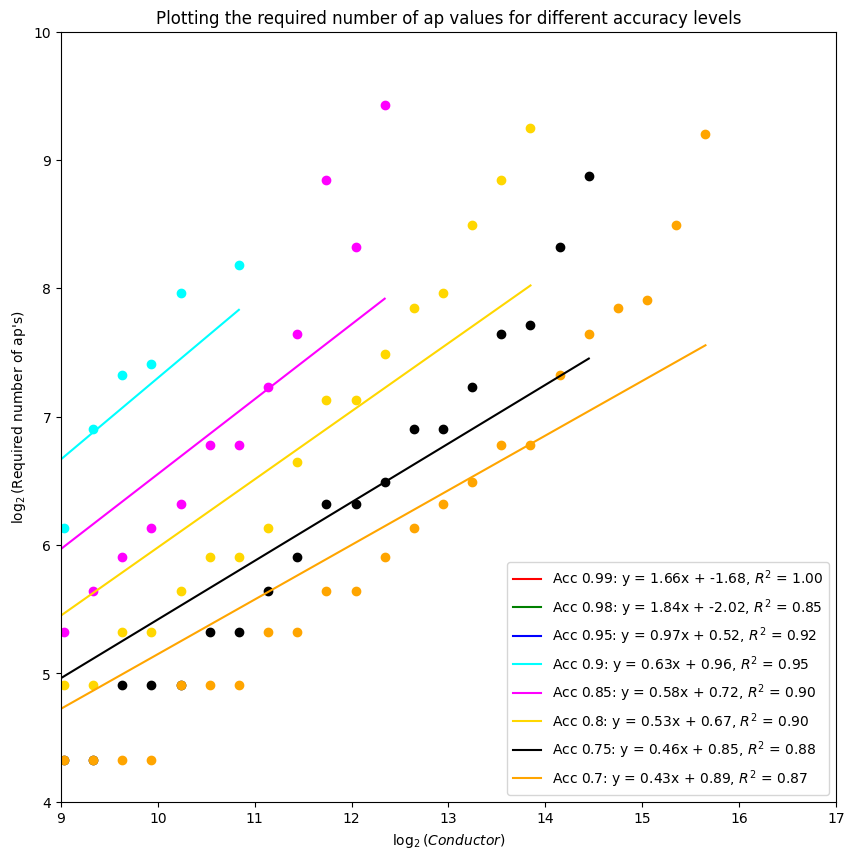

In [9]:
# Define colors for each subdictionary
colors = {0.99: 'red', 0.98: 'green', 0.95: 'blue', 0.9: 'cyan', 0.85: 'magenta', 0.8: 'gold', 0.75: 'black', 0.7: 'orange'}

plt.figure(figsize=(10, 10))

for accuracy, pairs in restructured_dict.items():
    # Remove pairs with 'nan' values
    cleaned_pairs = [(x, y) for x, y in pairs if y > 0]
    if cleaned_pairs:
        x_vals, y_vals = zip(*cleaned_pairs)
        y_vals = [math.log(y, 2) for y in y_vals]
        # Convert to numpy arrays for linear regression
        x_np = np.array(x_vals, dtype=np.float64)
        y_np = np.array(y_vals, dtype=np.float64)
        # Calculate the coefficients of the line of best fit
        m, b = np.polyfit(x_np, y_np, 1)
        # Calculate predictions
        y_pred = m * x_np + b

        # Calculate R^2
        ss_res = np.sum((y_np - y_pred) ** 2)
        ss_tot = np.sum((y_np - np.mean(y_np)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)

        # Plot the cleaned scatter plot
        plt.scatter(x_vals, y_vals, color=colors[accuracy])
        # Plot the line of best fit
        plt.plot(x_np, y_pred, color=colors[accuracy], label=f'Acc {accuracy}: y = {m:.2f}x + {b:.2f}, $R^2$ = {r_squared:.2f}')

# Set the limits of the x and y axes
plt.xlim(9, 17)
plt.ylim(4, 10)

# Add labels and legend
plt.xlabel('$\log_2(Conductor)$')
plt.ylabel("$\log_2$(Required number of ap's)")
plt.title('Plotting the required number of ap values for different accuracy levels')
plt.legend()

# Show the plot
plt.show()

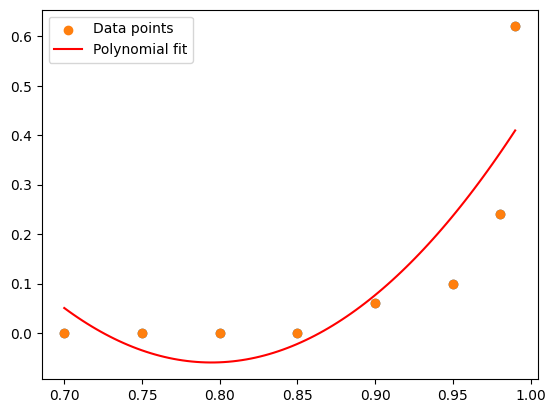

In [11]:
accs=np.array([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.98, 0.99])
slopes = np.array([0, 0, 0, 0, 0.06, 0.1, 0.24, 0.62])
plt.scatter(accs, slopes)
a, b, c= np.polyfit(accs, slopes, 2)
# Create a polynomial function from the coefficients
p = np.poly1d([a, b, c])

# Generate a range of x-values for plotting the polynomial
x_range = np.linspace(accs.min(), accs.max(), 100)

# Calculate the corresponding y-values using the polynomial function
y_poly = p(x_range)

# Plotting
plt.scatter(accs, slopes, label='Data points')
plt.plot(x_range, y_poly, color='red', label='Polynomial fit')
plt.legend()
plt.show()


In [12]:
p(1)

np.float64(0.4589620136175325)